In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [16]:
data=load_breast_cancer()
df=pd.DataFrame(data["data"],columns=data["feature_names"])
df["Target"]=data["target"]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [19]:
df[["Target"]].value_counts()

Target
1         357
0         212
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [22]:
X=df.drop("Target",axis=1)
y=df["Target"]

In [43]:
from sklearn.feature_selection import chi2,mutual_info_classif,VarianceThreshold,f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from skfeature.function.similarity_based import fisher_score

<AxesSubplot:>

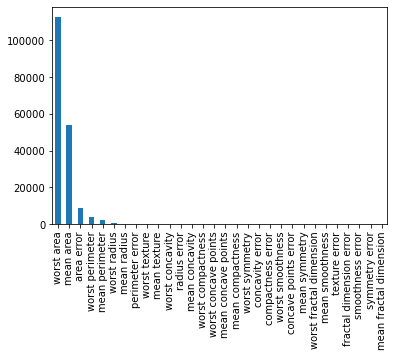

In [61]:
chi,p_val=chi2(X,y)
s1=pd.Series(chi,index=X.columns)
s1.sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:>

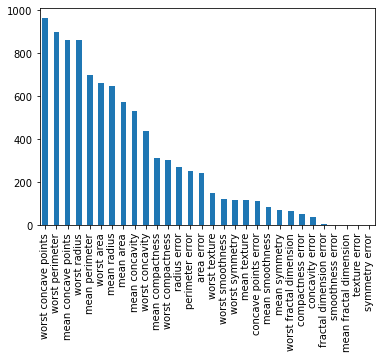

In [62]:
ann,p_val=f_classif(X,y)
s2=pd.Series(ann,index=X.columns)
s2.sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:>

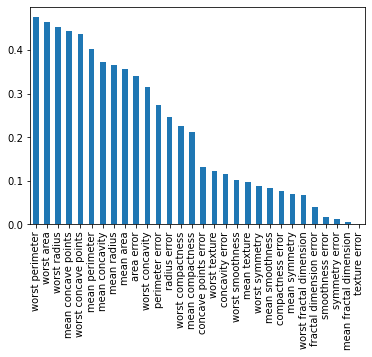

In [63]:
info=mutual_info_classif(X,y)
s3=pd.Series(info,index=X.columns)
s3.sort_values(ascending=False).plot(kind="bar")

In [70]:
vari=VarianceThreshold(0.1)
vari.fit(X,y)
vari.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'texture error', 'perimeter error', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area'], dtype=object)

<AxesSubplot:>

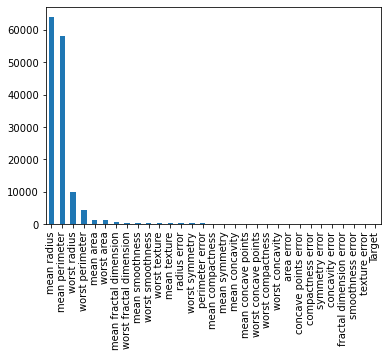

In [73]:
vif=[variance_inflation_factor(df.values,index) for index in range(len(df.columns))]
s4=pd.Series(vif,index=df.columns)
s4.sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:>

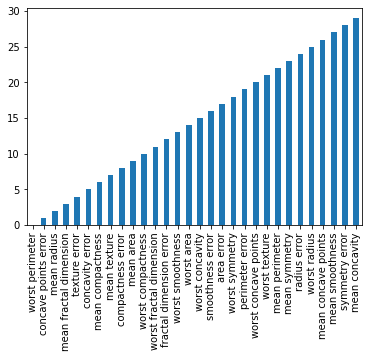

In [80]:
rank=fisher_score.fisher_score(X.values,y)
s5=pd.Series(rank,index=X.columns)
s5.sort_values().plot(kind="bar")

In [24]:
from imblearn.over_sampling import SMOTE

In [26]:
sm=SMOTE(sampling_strategy=0.90)
X_sm,y_sm=sm.fit_resample(X,y)
X_sm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,...,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,...,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,...,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,...,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,15.994893,19.603008,106.362916,791.928869,0.109318,0.174021,0.144152,0.088618,0.203970,0.068642,...,20.751550,29.858722,136.684194,1308.823703,0.163729,0.476416,0.446785,0.197148,0.373920,0.110571
674,15.158494,28.404308,97.129808,717.809370,0.084600,0.057286,0.048169,0.028385,0.182826,0.054883,...,17.362578,35.223170,110.802846,939.321265,0.117706,0.142586,0.194268,0.076549,0.322198,0.068502
675,16.848416,21.363168,108.705866,877.217604,0.080532,0.080556,0.065072,0.032380,0.172925,0.054424,...,18.939120,26.887683,125.802639,1070.328440,0.105978,0.267543,0.254774,0.092259,0.400991,0.074483
676,17.991956,19.752731,116.624996,993.385886,0.089120,0.103063,0.089213,0.056795,0.165076,0.056773,...,20.585436,26.840132,133.984786,1302.652225,0.128278,0.233882,0.344924,0.138321,0.271341,0.081196


In [28]:
y_sm.value_counts()

1    357
0    321
Name: Target, dtype: int64

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.25)

# Logistic_regression

In [85]:
log_reg=LogisticRegression(max_iter=500)
log_reg.fit(X_train,y_train)

C:\Users\Atul\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [91]:
def evaluation(model,X_value,y_value):
    pred=model.predict(X_value)
    cm=confusion_matrix(y_value,pred)
    print(f"{cm=}")
    clf=classification_report(y_value,pred)
    print(f"{clf=}")
    acc=accuracy_score(y_value,pred)
    print(f"{acc=}")
    

In [92]:
evaluation(log_reg,X_train,y_train)

cm=array([[237,  14],
       [ 11, 246]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95       251\n           1       0.95      0.96      0.95       257\n\n    accuracy                           0.95       508\n   macro avg       0.95      0.95      0.95       508\nweighted avg       0.95      0.95      0.95       508\n'
acc=0.9507874015748031


In [93]:
evaluation(log_reg,X_test,y_test)

cm=array([[66,  4],
       [ 3, 97]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95        70\n           1       0.96      0.97      0.97       100\n\n    accuracy                           0.96       170\n   macro avg       0.96      0.96      0.96       170\nweighted avg       0.96      0.96      0.96       170\n'
acc=0.9588235294117647


# KNN

In [95]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [96]:
evaluation(knn,X_train,y_train)

cm=array([[232,  19],
       [ 10, 247]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       0.96      0.92      0.94       251\n           1       0.93      0.96      0.94       257\n\n    accuracy                           0.94       508\n   macro avg       0.94      0.94      0.94       508\nweighted avg       0.94      0.94      0.94       508\n'
acc=0.9429133858267716


In [97]:
evaluation(knn,X_test,y_test)

cm=array([[66,  4],
       [ 7, 93]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       0.90      0.94      0.92        70\n           1       0.96      0.93      0.94       100\n\n    accuracy                           0.94       170\n   macro avg       0.93      0.94      0.93       170\nweighted avg       0.94      0.94      0.94       170\n'
acc=0.9352941176470588


In [100]:
# hyperparameter_tunning
hyp={"n_neighbors":np.arange(1,20),"p":[1,2]}
hyp

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 'p': [1, 2]}

In [101]:
rscv=RandomizedSearchCV(knn,hyp,cv=5)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'p': [1, 2]})

In [102]:
rscv.best_estimator_

KNeighborsClassifier(n_neighbors=11, p=1)

In [103]:
rscv.best_params_

{'p': 1, 'n_neighbors': 11}

In [104]:
knn_hyp=KNeighborsClassifier(p=1,n_neighbors=11)
knn_hyp.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

In [105]:
evaluation(knn_hyp,X_train,y_train)

cm=array([[229,  22],
       [ 10, 247]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       0.96      0.91      0.93       251\n           1       0.92      0.96      0.94       257\n\n    accuracy                           0.94       508\n   macro avg       0.94      0.94      0.94       508\nweighted avg       0.94      0.94      0.94       508\n'
acc=0.937007874015748


In [106]:
evaluation(knn_hyp,X_test,y_test)

cm=array([[66,  4],
       [ 3, 97]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95        70\n           1       0.96      0.97      0.97       100\n\n    accuracy                           0.96       170\n   macro avg       0.96      0.96      0.96       170\nweighted avg       0.96      0.96      0.96       170\n'
acc=0.9588235294117647


# Dtree

In [107]:
dtree=DecisionTreeClassifier(random_state=23)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=23)

In [109]:
evaluation(dtree,X_train,y_train)

cm=array([[251,   0],
       [  0, 257]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       251\n           1       1.00      1.00      1.00       257\n\n    accuracy                           1.00       508\n   macro avg       1.00      1.00      1.00       508\nweighted avg       1.00      1.00      1.00       508\n'
acc=1.0


In [110]:
evaluation(dtree,X_test,y_test)

cm=array([[68,  2],
       [ 4, 96]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       0.94      0.97      0.96        70\n           1       0.98      0.96      0.97       100\n\n    accuracy                           0.96       170\n   macro avg       0.96      0.97      0.96       170\nweighted avg       0.97      0.96      0.96       170\n'
acc=0.9647058823529412


In [131]:
# hyperparameter_tunning
hyp={"criterion":["entropy","gini"],"max_depth":np.arange(5,25),"min_samples_split":np.arange(1,10),"min_samples_leaf":np.arange(1,10),"max_features":["auto","sqrt","log2"]}
hyp

{'criterion': ['entropy', 'gini'],
 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24]),
 'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'max_features': ['auto', 'sqrt', 'log2']}

In [132]:
rscv=RandomizedSearchCV(dtree,hyp,cv=5)
rscv.fit(X_train,y_train)

C:\Users\Atul\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atul\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atul\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atul\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atu

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=23),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [133]:
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=8,
                       random_state=23)

In [134]:
rscv.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'entropy'}

In [135]:
dtree_hyp=DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=8,
                       random_state=23)
dtree_hyp.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=8,
                       random_state=23)

In [136]:
evaluation(dtree_hyp,X_train,y_train)

cm=array([[237,  14],
       [  7, 250]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       0.97      0.94      0.96       251\n           1       0.95      0.97      0.96       257\n\n    accuracy                           0.96       508\n   macro avg       0.96      0.96      0.96       508\nweighted avg       0.96      0.96      0.96       508\n'
acc=0.9586614173228346


In [137]:
evaluation(dtree_hyp,X_test,y_test)

cm=array([[65,  5],
       [ 4, 96]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       0.94      0.93      0.94        70\n           1       0.95      0.96      0.96       100\n\n    accuracy                           0.95       170\n   macro avg       0.95      0.94      0.95       170\nweighted avg       0.95      0.95      0.95       170\n'
acc=0.9470588235294117


# Randomforest

In [138]:
ranf=RandomForestClassifier(random_state=43)
ranf.fit(X_train,y_train)

RandomForestClassifier(random_state=43)

In [139]:
evaluation(ranf,X_train,y_train)

cm=array([[251,   0],
       [  0, 257]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       251\n           1       1.00      1.00      1.00       257\n\n    accuracy                           1.00       508\n   macro avg       1.00      1.00      1.00       508\nweighted avg       1.00      1.00      1.00       508\n'
acc=1.0


In [141]:
evaluation(ranf,X_test,y_test)

cm=array([[70,  0],
       [ 2, 98]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99        70\n           1       1.00      0.98      0.99       100\n\n    accuracy                           0.99       170\n   macro avg       0.99      0.99      0.99       170\nweighted avg       0.99      0.99      0.99       170\n'
acc=0.9882352941176471


In [144]:
# hyperparameter
hyp={"n_estimators":np.arange(5,200,10),"max_depth":np.arange(1,15),"min_samples_split":np.arange(1,10),"min_samples_leaf":np.arange(1,10),"max_features":["sqrt","log2"]}
hyp

{'n_estimators': array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195]),
 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'max_features': ['sqrt', 'log2']}

In [145]:
rscv=RandomizedSearchCV(ranf,hyp,cv=5)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=43),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195])})

In [147]:
rscv.best_estimator_

RandomForestClassifier(max_depth=12, max_features='log2', min_samples_leaf=6,
                       min_samples_split=3, n_estimators=145, random_state=43)

In [148]:
rscv.best_params_

{'n_estimators': 145,
 'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 12}

In [149]:
ranf_hyp=RandomForestClassifier(max_depth=12, max_features='log2', min_samples_leaf=6,
                       min_samples_split=3, n_estimators=145, random_state=43)
ranf_hyp.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, max_features='log2', min_samples_leaf=6,
                       min_samples_split=3, n_estimators=145, random_state=43)

In [150]:
evaluation(ranf_hyp,X_train,y_train)

cm=array([[245,   6],
       [  3, 254]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98       251\n           1       0.98      0.99      0.98       257\n\n    accuracy                           0.98       508\n   macro avg       0.98      0.98      0.98       508\nweighted avg       0.98      0.98      0.98       508\n'
acc=0.9822834645669292


In [151]:
evaluation(ranf_hyp,X_test,y_test)

cm=array([[69,  1],
       [ 3, 97]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97        70\n           1       0.99      0.97      0.98       100\n\n    accuracy                           0.98       170\n   macro avg       0.97      0.98      0.98       170\nweighted avg       0.98      0.98      0.98       170\n'
acc=0.9764705882352941


In [152]:
# Random forest given best model (genralised model) 

In [153]:
import pickle 
import json

In [154]:
with open("model.pickle","wb")as f:
    pickle.dump(ranf_hyp,f)

In [156]:
col_list=list(X.columns)
col_list

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [157]:
with open("col_list.json","w")as f:
    json.dump(col_list,f)